In [1]:
import webhoseio

In [7]:
webhoseio.config(token="8bec0992-4b9f-4f47-8138-90ff7f432814")
query_params = {
	"q": "Entertainment language:english site_type:news location:(United States)",
	"ts": "1579208540516",
	"sort": "replies_count"
}
output = webhoseio.query("filterWebContent", query_params)

In [13]:
len(output)

6

In [18]:
import urllib
import requests
import json
import pandas as pd

In [19]:
with open('D:/Study/Columbia/term2/6895/Data/675_20170904110837/675_webhose-2015-10-new_20170904110909/news_0000047.json','r',encoding='utf8')as fp:
    json_data=json.load(fp)

In [20]:
json_data

{'organizations': ['Hollywood Studios'],
 'uuid': 'f11d1fcc1922076650b832b3a14e1e904189f06d',
 'thread': {'social': {'gplus': {'shares': 0},
   'pinterest': {'shares': 0},
   'vk': {'shares': 0},
   'linkedin': {'shares': 0},
   'facebook': {'likes': 0, 'shares': 0, 'comments': 0},
   'stumbledupon': {'shares': 0}},
  'site_full': 'www.industriesnews.net',
  'main_image': '',
  'site_section': 'http://www.industriesnews.net/rss.php/?ind=entertainment',
  'section_title': 'industriesnews.net  - Breaking Entertainment News latest RSS headlines',
  'url': 'http://www.industriesnews.net/story?sid=s237554989&cid=55',
  'country': 'US',
  'title': 'Club Disney to premiere in new Hollywood Studios venue',
  'performance_score': 0,
  'site': 'industriesnews.net',
  'participants_count': 0,
  'title_full': 'Club Disney to premiere in new Hollywood Studios venue',
  'spam_score': 0.0,
  'site_type': 'news',
  'published': '2015-10-12T18:09:00.000+03:00',
  'replies_count': 0,
  'uuid': 'f11d1fcc

In [21]:
news={}
news['title']=json_data['title']
news['country']=json_data['thread']['country']
news['location']=json_data['locations']
news['published_date']=json_data['published']
news['text']=json_data['text']

In [40]:
import os
import glob
import pandas as pd
contents = []
json_dir_name = "D:/Study/Columbia/term2/6895/Data/675_20170904110837/675_webhose-2015-10-new_20170904110909"

json_pattern = os.path.join(json_dir_name,'*.json')
file_list=glob.glob(json_pattern)
for file in file_list:
    with open(file,'r',encoding='utf8')as fp:
        json_data=json.load(fp)
    news={}
    news['title']=json_data['title']
    news['country']=json_data['thread']['country']
    news['locations']=json_data['locations']
    news['published_date']=json_data['published']
    news['text']=json_data['text']    
    contents.append(news)

df = pd.DataFrame(contents)
df.head()
df.to_csv('D:/Study/Columbia/term2/6895/Data/News/2015_entertainmment_news.csv',index=False)

In [78]:
#df.to_json('D:/Study/Columbia/term2/6895/Data/News/2015_entertainmment_news.json',orient='records')

In [32]:
import pandas as pd
df1=pd.read_csv('D:/Study/Columbia/term2/6895/Data/News/2015_entertainmment_news.csv')

In [39]:
news=df1.drop(columns=['country','locations','published_date'])
news

,Unnamed: 0,title,text
0,0,NYC art exhibition gives food for thought,> Entertainment NYC art exhibition gives food ...
1,1,Tracy Morgan performs first stand-up show sinc...,Tracy Morgan performs first stand-up show sinc...
2,2,Esquire's Sexiest Woman Alive is the sultry Em...,SUBSCRIBE FOLLOW US © 2015 Cox Media Group . B...
3,3,President Barack Obama interviews author Maril...,FCC Information President Barack Obama intervi...
4,4,"I will perform at night clubs, shows – Pastor ...",Source: Ghana | Hitz FM | Euphemia Akpalu Date...
...,...,...,...
50277,50277,Springfield rock band takes a shot at the big ...,Springfield rock band takes a shot at the big ...
50278,50278,"Paris parties all night with silent disco, art...",> Entertainment Paris parties all night with s...
50279,50279,"Models, not celebrity guests, turn heads in Paris","> Top News Models, not celebrity guests, turn ..."
50280,50280,International Jewelry And Fashion Designer Mon...,"Monalisa Okojie, known as The Jewelry Designer..."


In [36]:
#remove puncutation/lower casing
import re
news['text_processed']=news['title'].map(lambda x: re.sub('[,\.!?]', '', x))
news['text_processed']=news['text_processed'].map(lambda x: x.lower())
news['text_processed'].head(10)

0            nyc art exhibition gives food for thought
1    tracy morgan performs first stand-up show sinc...
2    esquire's sexiest woman alive is the sultry em...
3    president barack obama interviews author maril...
4    i will perform at night clubs shows – pastor o...
5    suge knight katt williams ordered to trial in ...
6    presidential debate: inland democrats hope to ...
7    meg records' country star tom maclear will be ...
8                         defeat the zombie apocalypse
9    julianne moore rallies fellow actors to fight ...
Name: text_processed, dtype: object

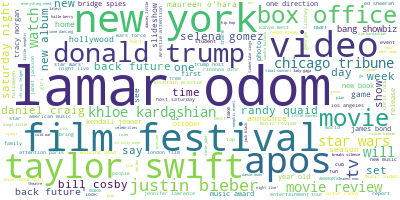

In [25]:
#exploratory analysis--wordcloud
from wordcloud import WordCloud
long_string=','.join(list(news['text_processed'].values))
wordcloud=WordCloud(background_color='white',max_words=5000,contour_width=3,contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

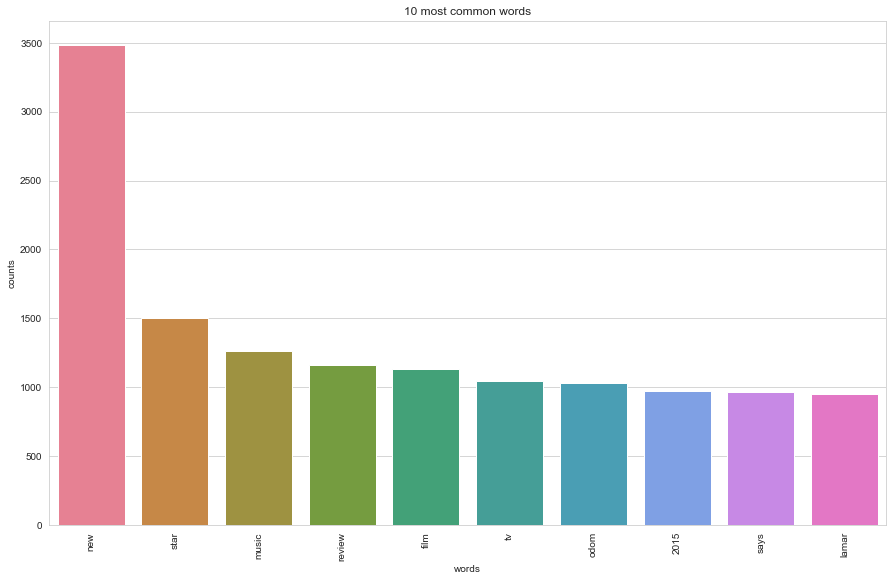

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(news['text_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [107]:
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [28]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 50
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
craig daniel bond tom brothel james character odom nevada star

Topic #1:
apos chicago tribune album new adele cubs campaign 25 studio

Topic #2:
star wars george interview political brand clooney crisis sandra bullock

Topic #3:
movie chris war review rock rihanna paris bridge mountain spies

Topic #4:
center clinton murphy sanders eddie afghan trial drugs start working

Topic #5:
makes county return news indian talk new jersey alia bhatt

Topic #6:
stars justin bieber photos dancing father proud hard nude gig

Topic #7:
awards music american win hall jackson rock car leads exclusive

Topic #8:
year 15 media prize 2015 latest cyrus nobel annual miley

Topic #9:
film festival best london named picture single chevalier really 13

Topic #10:
10 life slideshow things weekend tonight seasons canceled appearance chasing

Topic #11:
today record daughter hollywood cruise public cumberbatch chinese road accused

Topic #12:
award winning major work legend john 

In [ ]:
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [ ]:
https://blog.csdn.net/lashou_tech/article/details/51382475
https://blog.csdn.net/claire7/article/details/46637723
https://www.msra.cn/zh-cn/news/executivebylines/tech-bylines-personalized-recommendation-system
https://www.hanspub.org/journal/PaperInformation.aspx?paperID=32431


In [ ]:
#新闻API
https://webhose.io/web-content-api
#它的包的安装
https://pypi.org/project/webhoseio/

In [ ]:
#LDA
https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
http://dataskunkworks.com/2018/06/06/extracting-topics-from-11000-newsgroups-posts-with-python-gensim-and-lda/
https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21
https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial
https://ourcodingclub.github.io/2018/12/10/topic-modelling-python.html

In [ ]:
http://dspace.bracu.ac.bd/xmlui/bitstream/handle/10361/9015/13301028%2C13301019_CSE.pdf?sequence=1&isAllowed=y
http://paper.ijcsns.org/07_book/201608/20160820.pdf
https://juejin.im/post/5e08a15f6fb9a01610798833
https://www.ctolib.com/liuhuanyong-EventMonitor.html
https://www.ixueshu.com/document/674fa6ad8a98c6003b52cfb85d43b7a2318947a18e7f9386.html

In [1]:
import preprocessor.api as p
from preprocessor.api import clean, tokenize, parse, set_options
import pandas as pd
import re #regular expression
from textblob import TextBlob
import string
import nltk
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/kexinsu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
mg = pd.read_csv('/Users/kexinsu/Desktop/MatthewGood.csv',header=None)
mg_ls = mg.values.tolist()
s=''
for i in mg_ls:
    s=s+p.clean(str(i))
mg_ls
s

'["b\'This min has an in-studio visit with\\\\xc2\\\\xa0writer/artist ! We talked\\\\xc2\\\\xa0, ,\\\\xc2\\\\xa0\\\\xe2\\\\x80\\\\xa6 \'"]["b\'Hear the full min interview! Talked , , , , ,\\\\xe2\\\\x80\\\\xa6 \'"]["b\', , , , &amp; more came up in conversation with\\\\xc2\\\\xa0writer/artist\\\\xe2\\\\x80\\\\xa6 \'"][\'b"Here\\\'s the full min convo w/ writer / artist Kelly Brack in Ep.219! \\\\n\\\\nWe talk , , ,\\\\xe2\\\\x80\\\\xa6 "\']["b\'I really feel for the class of ...y\\\\xe2\\\\x80\\\\x99all been through it \\\\xf0\\\\x9f\\\\x92\\\\x80\'"]["b\'Talked , , , , , , , ,\\\\xe2\\\\x80\\\\xa6 \'"]["b\'Writer / artist Kelly Brack is a guest of Episode . \\\\n\\\\nWe\\\\xc2\\\\xa0talked\\\\xc2\\\\xa0, , , ,\\\\xe2\\\\x80\\\\xa6 \'"]["b\'Writer / artist is a guest of Episode . \\\\n\\\\nIn the full min convo we\\\\xc2\\\\xa0talked\\\\xc2\\\\xa0, ,\\\\xe2\\\\x80\\\\xa6 \'"]["b\'This min has an in-studio visit with\\\\xc2\\\\xa0writer/artist ! We talked\\\\xc2\\\\xa0, ,\\\\xc2\\\\xa0\

In [145]:
mg = pd.read_csv('/Users/kexinsu/Desktop/MatthewGood.csv',header=None)
mg_ls = mg.values.tolist()
#p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.SMILEY)
#p.set_options(p.OPT.URL, p.OPT.EMOJI)
def clean_tweet(ls):
    s=''
    for i in ls:
        s=s+p.clean(str(i))
    s1=s.replace('"b','')
    s2=s1.replace('b"','')
    s3=re.sub('x[a-z0-9][a-z0-9]','',s2)
    s4=s3.replace('\\n','')
    s5=s4.replace('&amp;','')
    s6=s5.translate(str.maketrans('', '', string.punctuation))
    s_clean=re.sub(' +', ' ',s6 )
    return s_clean
clean_tweet(mg_ls)

'This min has an instudio visit withwriterartist We talked Hear the full min interview Talked more came up in conversation withwriterartist Heres the full min convo w writer artist Kelly Brack in Ep219 We talk I really feel for the class of yall been through it Talked Writer artist Kelly Brack is a guest of Episode Wetalked Writer artist is a guest of Episode In the full min convo wetalked This min has an instudio visit withwriterartist We talked Hear the full min interview Talked Heres the full min convo w writer artist Kelly Brack in Ep219 We talk more came up in conversation withwriterartist Heres the full min convo w writer artist Kelly Brack in Ep219 We talk I washed it yesterday lolTalked Writer artist Kelly Brack is a guest of Episode Wetalked Hear the full min interview Talked This min has an instudio visit withwriterartist We talked more came up in conversation withwriterartist more came up in conversation withwriterartist Heres the full min convo w writer artist Kelly Brack i

In [146]:
from textblob import TextBlob
TextBlob(mg_clean).sentiment.polarity

0.3095238095238094